In [1]:
# Install all necessary packages
# pip install pandas numpy textblob scikit-learn nltk gensim spacy transformers torch

In [2]:
import nltk
import spacy

# Download necessary NLTK data
nltk.download('stopwords')

# Download spaCy English model
spacy.cli.download('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cherith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import sklearn
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, Dataset

In [4]:
df=pd.read_csv('final_half_cleaned_data_linkedin_posts.csv')
df

,Unnamed: 0,Name,Profession,Post Month Year,Post Text,Profile Link
0,0,Stacy Irwin,Salesforce Consultant | 5x Salesforce Certifie...,NaN,"""Laid off? It's not the end of the world.""Easy...",https://www.linkedin.com/in/stacyirwin?miniPro...
1,1,Milana Honovich,Client Services Associate at SPECTRAFORCE Tech...,September 2023,I cannot believe it's been a year since I got ...,https://www.linkedin.com/in/milana-honovich?mi...
2,2,Vasanth Bhat,47K+ Followers on LinkedIn | Speaks about fron...,April 2024,"People on LinkedIn v/s in real life:""My compan...",https://www.linkedin.com/in/careerwithvasanth?...
3,3,"Hector Torres, MBA",Data and Financial Analyst|| SQL/Python||Power...,June 2023,"Today was my last day with my company, just go...",https://www.linkedin.com/in/hector-torres-mba-...
4,4,Trevor Romero,Video Editor | Assistant Editor | Founder @ Yo...,June 2023,"The Linkedin “I just got laid off post"" is the...",https://www.linkedin.com/in/trevor-romero?mini...
...,...,...,...,...,...,...
586,586,Nevin Yilmaz,Senior Data Scientist | Lennar | Top Data Scie...,November 2023,I was #laidoff during maternity leave...In Jun...,https://www.linkedin.com/in/nevinyilmaz?miniPr...
587,587,Shannon Wall,Social Media Marketing Manager & Content Creat...,November 2023,"Well, I got let go. That was not on my 2023 bi...",https://www.linkedin.com/in/shannon-wall-73177...
588,588,Md Zaid Alam,Software Development Engineer @PanScience Inno...,November 2023,"Hello #Linkedin Community,I wanted to share a ...",https://www.linkedin.com/in/md-zaid-alam-45339...
589,589,Gabrielle Snow,UX Tools Designer | Technical Designer @ ZeniM...,November 2023,I got around to some UI work for my personal p...,https://www.linkedin.com/in/gabriellesnow?mini...


In [5]:
df.fillna('',inplace = True)
df.drop(columns=['Unnamed: 0','Profile Link'], inplace=True)

In [6]:
desired_columns = ['Post Text']
posttext_df = df[desired_columns]
posttext_df

,Post Text
0,"""Laid off? It's not the end of the world.""Easy..."
1,I cannot believe it's been a year since I got ...
2,"People on LinkedIn v/s in real life:""My compan..."
3,"Today was my last day with my company, just go..."
4,"The Linkedin “I just got laid off post"" is the..."
...,...
586,I was #laidoff during maternity leave...In Jun...
587,"Well, I got let go. That was not on my 2023 bi..."
588,"Hello #Linkedin Community,I wanted to share a ..."
589,I got around to some UI work for my personal p...


1. **Data Copying and Text Cleaning**:
   - Creates a copy of the DataFrame and converts text to lowercase.
   - Applies sentiment analysis to each text entry using TextBlob and stores the sentiment scores.

2. **Calculating Average Sentiment**:
   - Calculates the average sentiment score of all the posts.

3. **Categorizing Posts by Sentiment**:
   - Identifies positive, negative, and neutral posts based on their sentiment scores.

4. **Printing Results**:
   - Prints the average sentiment and the counts of positive, negative, and neutral posts.


In [7]:
#Sentiment Analysis

sentiment_df = posttext_df.copy()
sentiment_df['clean_text'] = sentiment_df['Post Text'].str.lower()
sentiment_df['sentiment'] = sentiment_df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

average_sentiment = sentiment_df['sentiment'].mean()

positive_posts = sentiment_df[sentiment_df['sentiment'] > 0.5]
negative_posts = sentiment_df[sentiment_df['sentiment'] < 0.5]
neutral_posts = sentiment_df[sentiment_df['sentiment'] == 0.5]

print("Average Sentiment:", average_sentiment)
print("Number of Positive Posts:", len(positive_posts))
print("Number of Negative Posts:", len(negative_posts))
print("Number of Neutral Posts:", len(neutral_posts))

Average Sentiment: 0.17220769777843448
Number of Positive Posts: 8
Number of Negative Posts: 581
Number of Neutral Posts: 2


## Insights from Sentiment Analysis:

### 1. Distribution of Posts:
- *Positive Posts:* There are 8 positive posts, which is a small fraction of the total.
- *Negative Posts:* There are only 581 negative posts, which is a significant majority.
- *Neutral Posts:* There are 2 neutral posts, which is also a very small number compared to the positive posts.

### 2. Overall Sentiment:
This indicates a weak positive sentiment at best. The number of negative posts (581) compared to positive posts (8) further confirms this negative lean. Overall, the sentiment analysis suggests a negative perception towards the topic being analyzed.

## \#################################################################################

# Topic Modeling with LDA: Key Steps Explained

1. *Library Imports and Data Loading*:
   - Essential libraries for data manipulation, visualization, and text processing (pandas, matplotlib, seaborn, nltk) are imported.
   - The dataset is copied into a DataFrame data.

2. *Text Preprocessing*:
   - *Stop Words Removal*: Common, uninformative words are removed using NLTK's stop words list.
   - *Stemming*: Words are reduced to their base forms using the Porter stemmer.
   - *Lowercasing*: All text is converted to lowercase to ensure consistency.
   - Preprocessed text is stored in a new column Preprocessed_Text.

3. *Vectorization*:
   - The CountVectorizer transforms the preprocessed text into a matrix of token counts, which serves as input for the LDA model.

4. *LDA Model Training*:
   - An LDA model is trained to identify 10 topics using specified parameters (n_components=10, random_state=69, max_iter=20, learning_method='online').

5. *Displaying Topics*:
   - A function display_topics_with_weights prints the top words and their weights for each topic, providing insight into the topic composition.

6. *Document-Topic Assignment*:
   - A function print_best_topic_weights identifies and prints the best topic and its weight for each document, highlighting the predominant topic in each document.

7. *Visualizing Top Words per Topic*:
   - A function plot_top_words_per_topic generates bar charts to visually represent the top words and their weights for each topic.

8. *Heatmap of Document-Topic Distribution*:
   - A heatmap visualizes the distribution of topics across documents, helping to understand how topics are spread throughout the dataset.

9. *Counting Documents per Topic*:
   - The number of documents associated with each topic is counted and visualized using a bar chart, illustrating the prevalence of each topic in the dataset.

10. *Summary*:
    - The code systematically preprocesses text, trains an LDA model, and visualizes the results, providing a comprehensive approach to topic modeling.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cherith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cherith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top words per topic with weights:
Topic 0: 12.935*"sport" + 6.089*"owner" + 5.170*"scrum" + 4.691*"soccer" + 3.747*"ryan" + 3.251*"agil" + 2.960*"pure" + 2.863*"athlet" + 2.804*"angel" + 2.765*"knock"
Topic 1: 7.334*"amazon" + 5.834*"sofi" + 5.573*"dog" + 5.165*"microsoft" + 4.733*"cogoport" + 3.520*"rapid" + 3.267*"charact" + 3.219*"kotlin" + 3.105*"walmart" + 3.036*"rubi"
Topic 2: 6.079*"clapping_hand" + 1.743*"axe" + 1.498*"panic" + 0.955*"again3" + 0.955*"pilier" + 0.955*"laidoffbutnotout" + 0.955*"selfreflect" + 0.955*"careerreboot" + 0.955*"selfbelief" + 0.955*"selfworth"
Topic 3: 911.644*"job" + 705.519*"work" + 646.260*"got" + 557.005*"laidoff" + 511.670*"time" + 467.965*"help" + 454.574*"get" + 375.038*"year" + 373.769*"know" + 370.472*"laid"
Topic 4: 62.007*"get" + 54.695*"got" + 42.905*"laidoff" + 41.562*"fire" + 37.994*"make" + 37.929*"take" + 37.360*"time" + 37.348*"like" + 36.387*"life" + 33.360*"one"
Topic 5: 43.093*"sparkl" + 15.391*"greenbannergang" + 13.644*"changeman

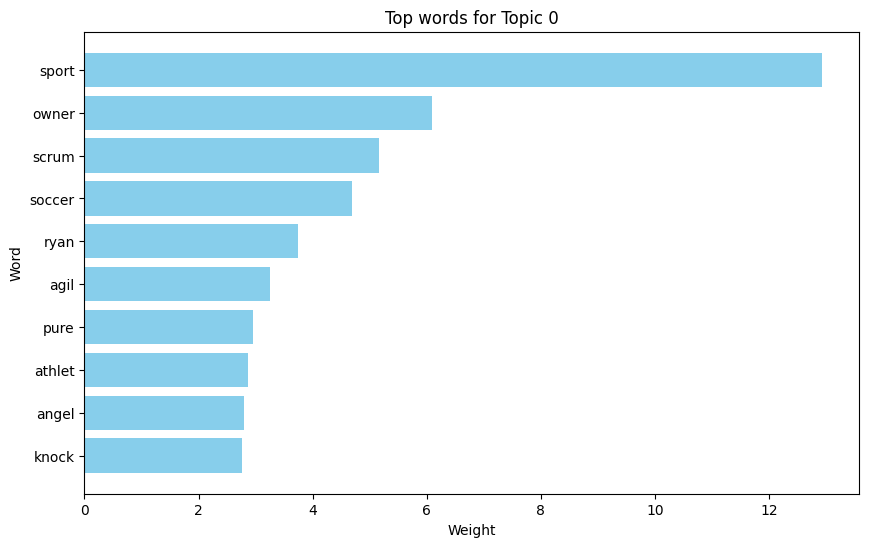

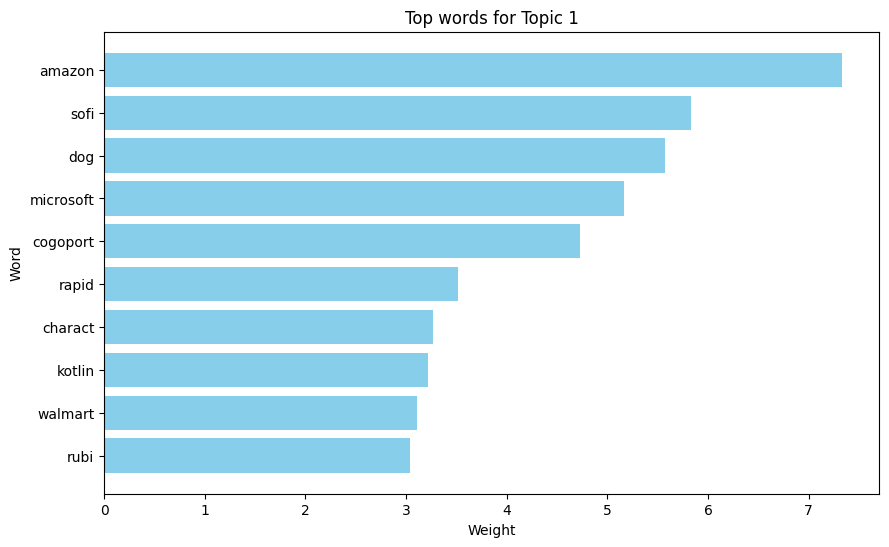

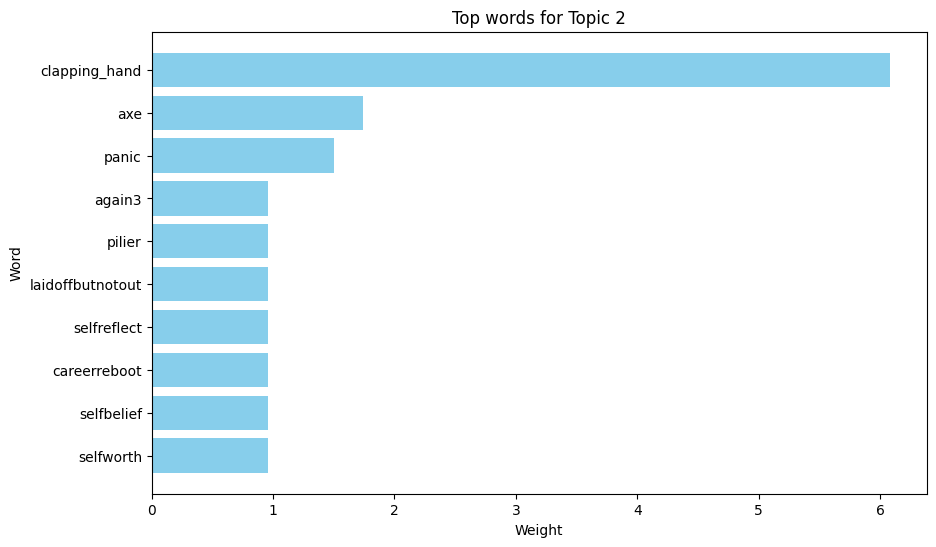

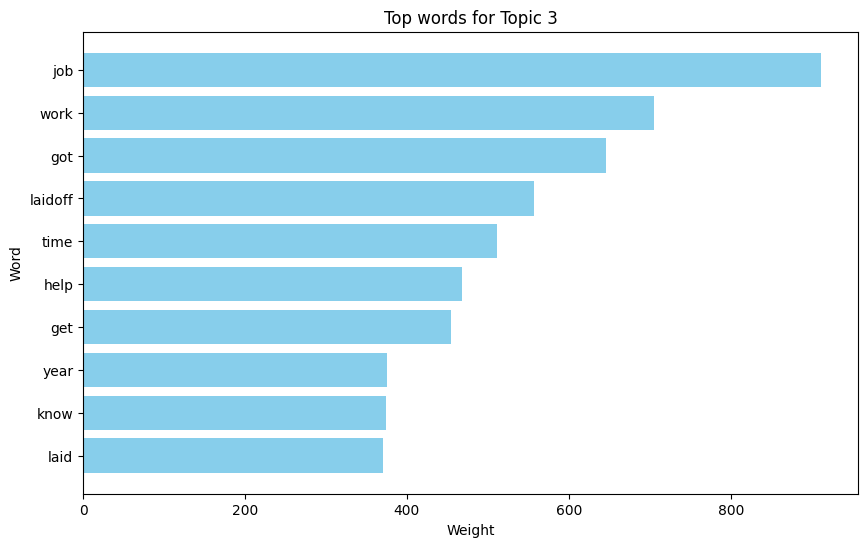

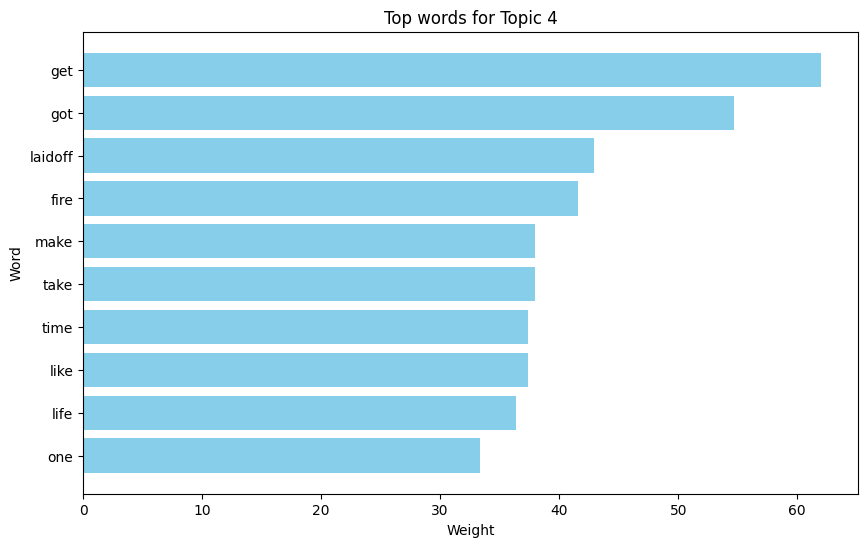

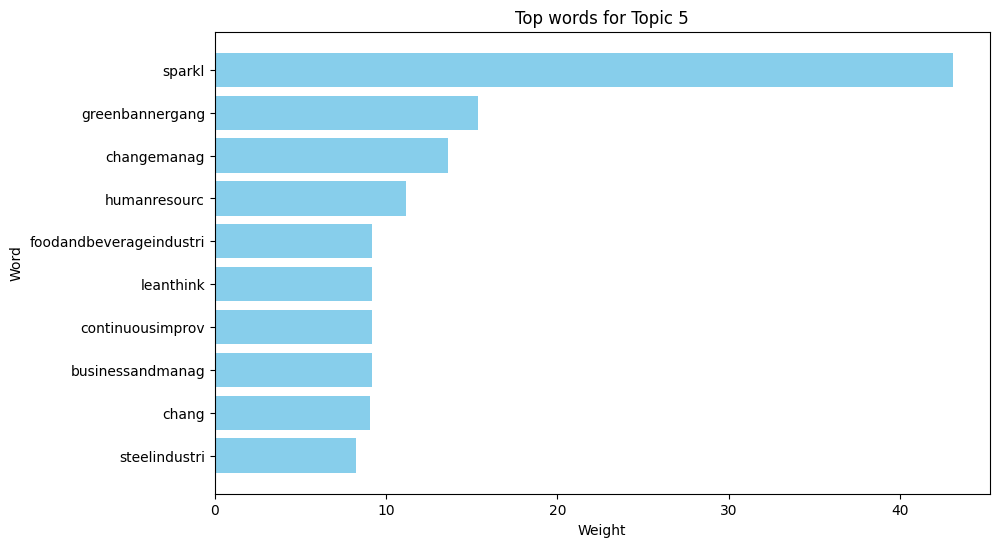

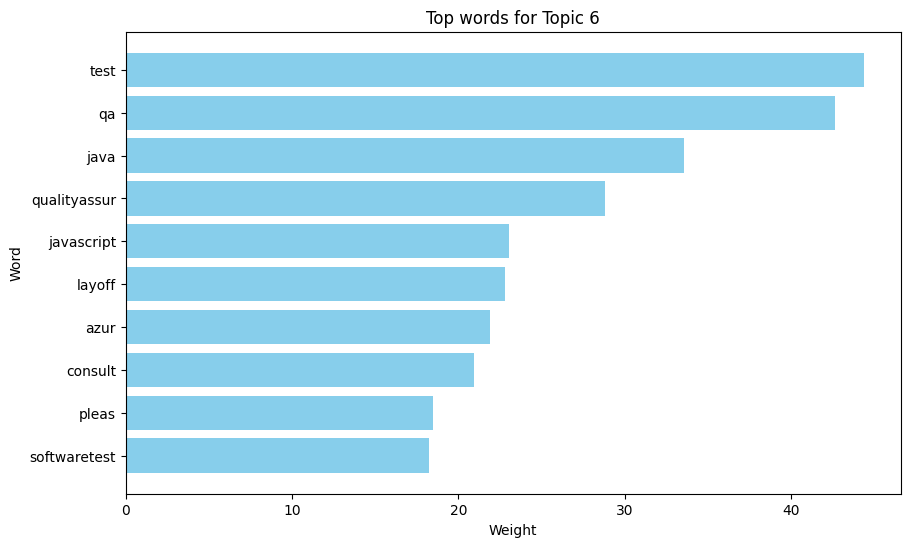

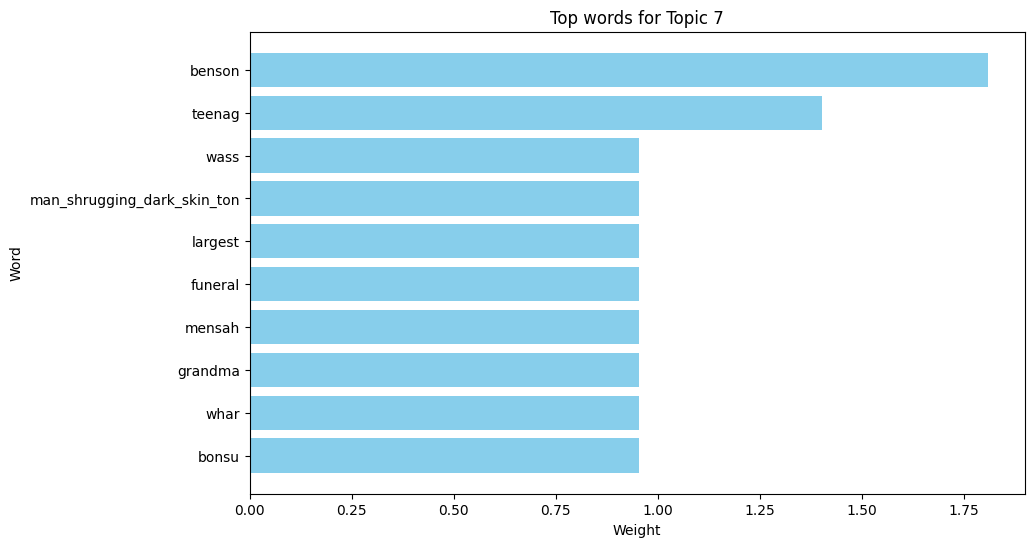

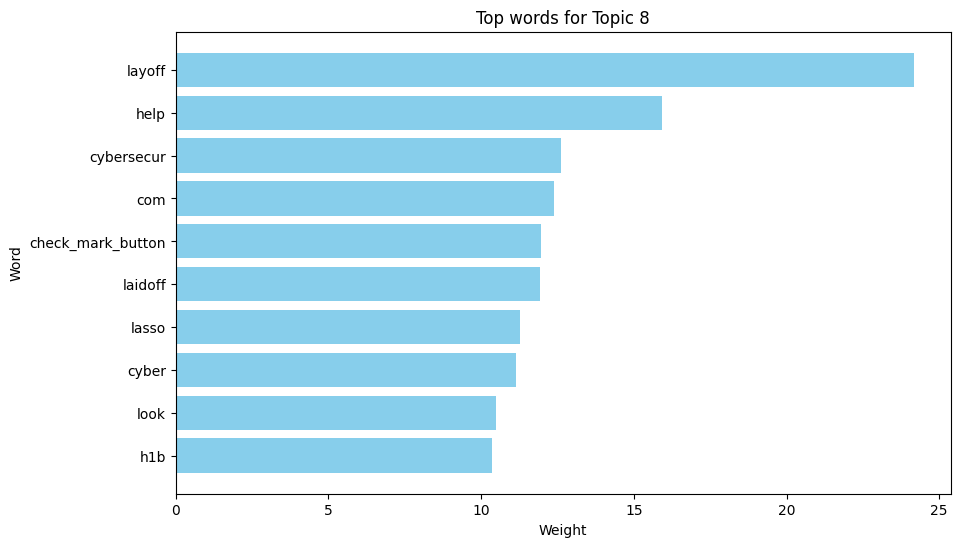

c:\Users\Cherith\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Cherith\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Cherith\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45909 (\N{HANGUL SYLLABLE DEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Cherith\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Cherith\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pyla

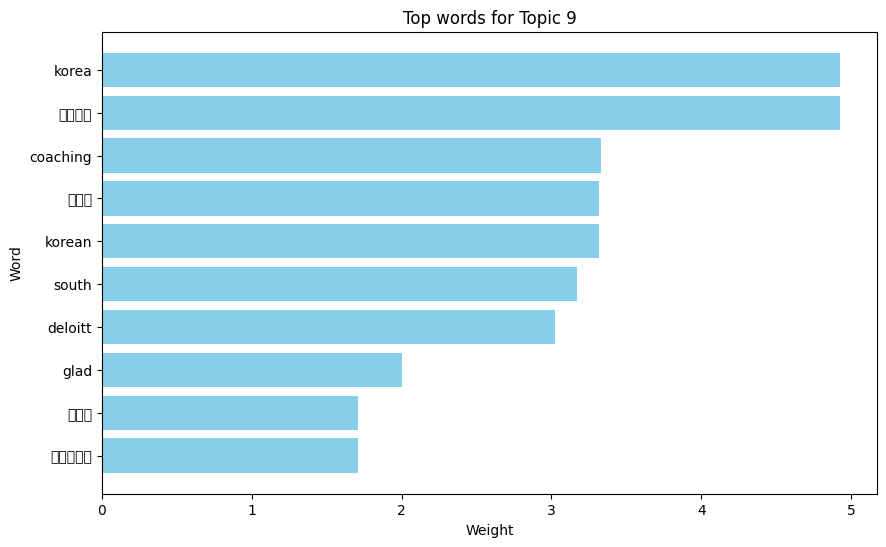

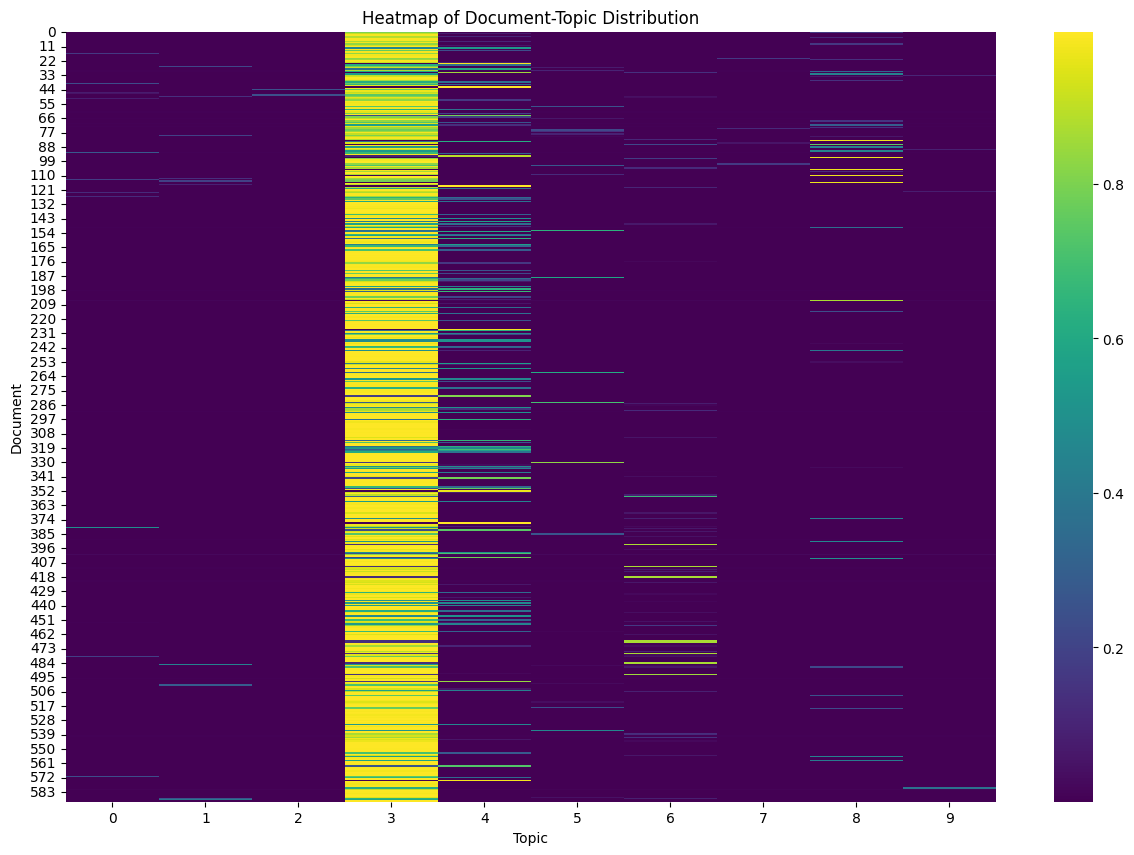

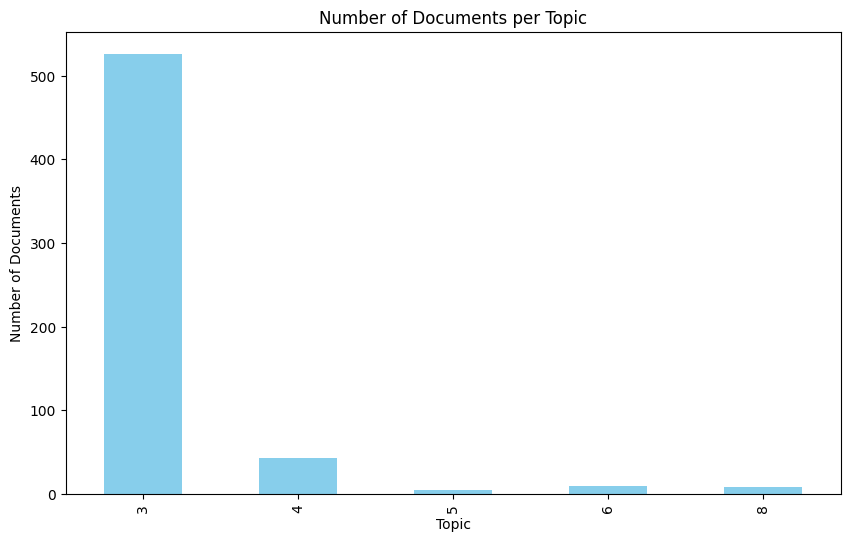

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
#data = pd.read_csv('your_dataset.csv')
topicmodel_df = df.copy()
data =topicmodel_df.copy()
# Preprocess the text data (including stemming)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
data['Preprocessed_Text'] = data['Post Text'].apply(lambda x: ' '.join([stemmer.stem(word.lower()) for word in word_tokenize(x) if word.lower() not in stop_words]))

# Vectorize the preprocessed text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Preprocessed_Text'])

# Perform Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=10, random_state=69, max_iter=20, learning_method='online')
lda.fit(X)

# Function to print top words per topic with weights
def display_topics_with_weights(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [f'{topic[i]:.3f}*"{feature_names[i]}"' for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {' + '.join(topic_words)}")

# Function to print the best topic with weight for each document
def print_best_topic_weights(lda_output):
    for i, document_topics in enumerate(lda_output):
        best_topic = document_topics.argmax()
        best_topic_weight = document_topics[best_topic]
        print(f"Document {i}: Best Topic {best_topic} with weight {best_topic_weight:.4f}")

# Display the top words per topic with weights
print("Top words per topic with weights:")
display_topics_with_weights(lda, vectorizer.get_feature_names_out(), 10)

# Display the best topic with weight for each document
print("\nDocument-best topic weights:")
lda_output = lda.transform(X)
print_best_topic_weights(lda_output)

# Visualization: Top words per topic
def plot_top_words_per_topic(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        plt.figure(figsize=(10, 6))
        plt.barh(top_features, weights, color='skyblue')
        plt.gca().invert_yaxis()
        plt.title(f"Top words for Topic {topic_idx}")
        plt.xlabel("Weight")
        plt.ylabel("Word")
        plt.show()

# Plot the top words per topic
plot_top_words_per_topic(lda, vectorizer.get_feature_names_out(), 10)

# Visualization: Heatmap of document-topic distribution
plt.figure(figsize=(15, 10))
sns.heatmap(lda_output, cmap='viridis', annot=False)
plt.title("Heatmap of Document-Topic Distribution")
plt.xlabel("Topic")
plt.ylabel("Document")
plt.show()

# Count the number of documents per topic
best_topic_per_doc = lda_output.argmax(axis=1)
topic_counts = pd.Series(best_topic_per_doc).value_counts().sort_index()

# Visualization: Number of documents per topic
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Documents per Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.show()

To determine the significance of each topic with respect to layoffs and identify which topic best describes layoffs, we can analyze the top words associated with each topic. Based on the provided top words per topic with weights, here's an assessment of the significance of each topic and the topic that best describes layoffs:

1. *Topic 0 (Sports-related terms)*:
   - This topic seems to be unrelated to layoffs as it contains words like "sport", "owner", "soccer", and "athlete". It likely pertains to discussions about sports and related activities, rather than employment-related topics like layoffs.

2. *Topic 1 (Company and Industry Names)*:
   - This topic includes company names such as "Amazon", "Microsoft", and "Walmart". While it might involve discussions about layoffs within these companies, it's not specific to layoffs and may cover various other aspects of these companies' operations.

3. *Topic 2 (Emotional Responses)*:
   - This topic contains emotional terms like "clapping_hand" and phrases like "laidoffbutnotout" and "selfworth". While emotions are certainly relevant to the experience of being laid off, this topic appears to focus more on emotional responses to various situations rather than directly discussing layoffs.

4. *Topic 3 (Employment-related Terms)*:
   - This topic includes terms highly relevant to layoffs such as "job", "laidoff", "help", "get", and "know". It appears to be the most significant topic related to layoffs as it directly discusses employment-related terms and experiences, making it the best descriptor for layoffs.

5. *Topic 4 (General Action and Life Terms)*:
   - This topic contains general action terms like "get", "got", "make", and "take", as well as broader terms like "life". While some terms like "laidoff" are relevant to layoffs, this topic covers a wide range of actions and experiences beyond just layoffs.

6. *Topic 5 (Business and Management Terms)*:
   - This topic includes terms related to business management such as "changemanag", "humanresourc", and "continuousimprov". While discussions about organizational changes may involve mentions of layoffs, this topic seems to focus more broadly on business processes and improvement strategies.

7. *Topic 6 (Software and Quality Assurance Terms)*:
   - This topic contains terms related to software development and quality assurance, such as "test", "qa", "java", and "qualityassur". While discussions about layoffs in the tech industry may involve these terms, this topic appears to be more about technical aspects of software development rather than layoffs specifically.

8. *Topic 7 (Miscellaneous Terms)*:
   - This topic includes miscellaneous terms like "benson", "teenag", and "funeral", which do not seem directly related to layoffs. It likely covers a variety of unrelated subjects.

9. *Topic 8 (Employment and Cybersecurity Terms)*:
   - This topic contains terms related to employment ("layoff", "laidoff") as well as cybersecurity terms like "cybersecur" and "cyber". While it includes employment-related terms, it also encompasses cybersecurity discussions, making it less specific to layoffs.

10. *Topic 9 (Language-specific Terms)*:
    - This topic includes terms in a non-English language (Korean), coaching-related terms, and other language-specific terms. While language may not directly relate to layoffs, discussions about layoffs could certainly occur in various languages.

### Conclusion:
- *Topic 3 (Employment-related Terms)* appears to be the most significant topic related to layoffs, with terms directly associated with employment and layoffs.
- *Topic 8 (Employment and Cybersecurity Terms)* also includes relevant employment-related terms but extends to cybersecurity discussions.
- Other topics cover a range of subjects including sports, emotional responses, business management, and miscellaneous terms, but they are less directly related to layoffs compared to Topic 3.

By analyzing the significance of each topic and the words associated with them, we can determine which topics are most relevant to discussions about layoffs.

## \#################################################################################

# Named Entity Recognition and Text Processing: Key Steps Explained

1. *Library Imports and Model Loading*:
   - Imports pandas for data handling, spacy for NLP, and SnowballStemmer from nltk.stem for stemming.
   - Loads the spaCy English language model (en_core_web_sm) for processing text and recognizing named entities.

2. *Stemming Initialization*:
   - Initializes the Snowball Stemmer for the English language to perform stemming on tokens.

3. *Text Processing Function*:
   - Defines process_text_and_extract_entities to process text, stem tokens, remove stop words, and extract named entities (organizations, locations, persons) using spaCy.

4. *DataFrame Setup*:
   - Creates a DataFrame ner_df with a column 'Post Text' containing the text data to be analyzed.

5. *Function Application*:
   - Applies the text processing function to each document in the DataFrame.
   - Stores the resulting stemmed tokens and named entities in lists (stemmed_tokens_list and named_entities_list).

6. *DataFrame Update and Display*:
   - Adds a new column 'Named Entities' to the DataFrame, containing extracted named entities.

In [9]:
#Named Entity Recognition
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import SnowballStemmer

# Load English language model
nlp = spacy.load('en_core_web_sm')

# Initialize Snowball Stemmer
stemmer = SnowballStemmer('english')

# Define a function to process text, apply stemming, and extract unique named entities
def process_text_and_extract_entities(text):
    # Process the text with spaCy NLP pipeline
    doc = nlp(text)
    # Apply stemming and remove stop words
    stemmed_tokens = [stemmer.stem(token.text) for token in doc if token.text.lower() not in STOP_WORDS and token.text.isalpha()]
    # Remove duplicate stemmed tokens
    unique_stems = list(set(stemmed_tokens))
    # Extract named entities
    named_entities = {ent.text for ent in doc.ents if ent.label_ in ['ORG', 'LOC', 'PERSON']}
    return unique_stems, named_entities

# Example DataFrame with 'Post Text' column
ner_df = posttext_df[['Post Text']].copy()

# Apply the function to each text document in the dataset
stemmed_tokens_list = []
named_entities_list = []
for text in ner_df['Post Text']:
    stemmed_tokens, named_entities = process_text_and_extract_entities(text)
    stemmed_tokens_list.append(stemmed_tokens)
    named_entities_list.append(named_entities)

# Add named entities column to the dataframe
ner_df['Named Entities'] = named_entities_list

# Display the DataFrame with post text, stemmed tokens, and named entities
ner_df


,Post Text,Named Entities
0,"""Laid off? It's not the end of the world.""Easy...","{Laid, RIF #}"
1,I cannot believe it's been a year since I got ...,{NEED}
2,"People on LinkedIn v/s in real life:""My compan...",{laidoff}
3,"Today was my last day with my company, just go...",{laidoff}
4,"The Linkedin “I just got laid off post"" is the...",{WGA}
...,...,...
586,I was #laidoff during maternity leave...In Jun...,{worth.:seedling::light_bulb:#dataanalysis#dat...
587,"Well, I got let go. That was not on my 2023 bi...",{}
588,"Hello #Linkedin Community,I wanted to share a ...","{India Ola, BTech, Google Guice, Amazon, Algor..."
589,I got around to some UI work for my personal p...,"{UI, RPG}"


## Insights from Named Entity Recognition:

- NER can extract valuable insights from text, such as in the example: "RIF #, Laid, NEED, laidoff, NIT Patna, Amazon, India, Ola, Ruby on Rails…". This suggests layoffs at notable organizations like Amazon and Ola, which are based in India. "NIT Patna" likely refers to an educational institution, indicating that its graduates might be relevant to the context, possibly those being laid off or sought after. The mention of "Ruby on Rails" points to a specific technical skill set, implying that individuals with expertise in this area are part of the conversation.

- Key insights from NER analysis highlight employment changes, particularly layoffs at major tech companies, impacting individuals with certain educational backgrounds and technical skills. This information is crucial for understanding employment trends in the tech sector and can assist in tailoring re-skilling programs, job placement services, and recruitment efforts. Additionally, these insights can aid in market analysis by predicting potential job market trends based on the affected skills and industries.

## \#################################################################################

## The code performs the following steps for keyword extraction:
1. *Library Imports and Setup*: Sets up necessary libraries for text processing and NLP.
2. *Text Preprocessing*: Cleans and preprocesses text data by removing punctuation, stopwords, and applying stemming.
3. *TF-IDF Vectorization*: Converts preprocessed text into TF-IDF features to quantify the importance of terms.
4. *TF-IDF Keyword Extraction*: Extracts keywords based on their TF-IDF scores.
5. *Noun-Based Keyword Extraction*: Uses spaCy to extract and count nouns and proper nouns, identifying the most frequent keywords.
6. *Display Top Keywords*: Outputs the top 50 keywords along with their scores.

In [10]:
#Keyword Extraction
import pandas as pd
from nltk.corpus import stopwords  # Importing libraries

# Assuming a 'text' column contains your text data
text_data = posttext_df['Post Text']
from nltk.stem import PorterStemmer  # Import Stemmer library

stop_words = stopwords.words('english')  # Download stopwords

def preprocess_text(text):
  # Lowercase text
  text = text.lower()
  # Remove punctuation
  text = ''.join([char for char in text if char.isalnum() or char == ' '])
  # Remove stopwords
  text = ' '.join([word for word in text.split() if word not in stop_words])
  
  # Stemming - Create a stemmer object
  stemmer = PorterStemmer()
  # Apply stemming to each word
  text = ' '.join([stemmer.stem(word) for word in text.split()])
  return text

# Apply preprocessing to your text data
preprocessed_text = text_data.apply(preprocess_text)
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# Install spaCy if needed: pip install spacy
nlp = spacy.load('en_core_web_sm')  # Load English small model (adjust as needed)

# Sample data (replace with your preprocessed text)
preprocessed_text = text_data.apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=1000)  # Set max features to extract (optional)
tfidf_matrix = vectorizer.fit_transform(preprocessed_text)

# Get keywords with highest TF-IDF scores
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)  # Convert to dense matrix

# Extract top N keywords based on noun scores
noun_scores = {}
for doc in nlp.pipe(preprocessed_text, batch_size=50):  # Process text in batches
    for token in doc:
        if token.pos_ in ('NOUN', 'PROPN'):  # Check for nouns and proper nouns
            if token.text in noun_scores:
                noun_scores[token.text] += 1
            else:
                noun_scores[token.text] = 1

top_n_keywords = sorted(noun_scores.items(), key=lambda x: x[1], reverse=True)[:50]

print("Top 50 Keywords (Nouns):")
for keyword, score in top_n_keywords:
    print(f"{keyword}: {score:.4f}")

Top 50 Keywords (Nouns):
job: 869.0000
work: 575.0000
time: 528.0000
laidoff: 385.0000
year: 370.0000
peopl: 339.0000
compani: 288.0000
day: 254.0000
opportun: 250.0000
layoff: 234.0000
month: 229.0000
role: 220.0000
career: 220.0000
post: 217.0000
mani: 216.0000
interview: 212.0000
thing: 200.0000
life: 196.0000
experi: 189.0000
help: 188.0000
manag: 184.0000
network: 181.0000
way: 170.0000
share: 168.0000
busi: 167.0000
week: 166.0000
team: 166.0000
skill: 162.0000
opentowork: 162.0000
recruit: 158.0000
market: 157.0000
posit: 153.0000
support: 153.0000
linkedin: 148.0000
someon: 144.0000
pleas: 143.0000
person: 135.0000
hope: 133.0000
search: 128.0000
today: 123.0000
commun: 122.0000
love: 122.0000
i: 120.0000
friend: 119.0000
appli: 117.0000
hire: 115.0000
resum: 115.0000
realli: 108.0000
jobsearch: 104.0000
lot: 103.0000


## Insights from Keyword Extraction:

### 1. Dominant Themes:
- *Employment and Job Search:* Keywords such as "job," "work," "laidoff," "layoff," "role," "career," "interview," "jobsearch," and "resum" indicate a strong focus on employment, job loss, and job searching activities.
- *Time and Duration:* Words like "time," "year," "day," "month" suggest that the duration and timing are significant, potentially referring to periods of unemployment or job search duration.

### 2. Impact of Layoffs:
- The prominence of "laidoff" and "layoff" highlights that layoffs are a critical issue. This suggests a high concern or focus on the impact of layoffs on individuals and perhaps the broader economic or corporate environment.

### 3. Human Element and Experience:
- Keywords like "peopl," "life," "experi," "help," "network," and "way" imply that the human experience and social aspects are significant. Networking, personal experiences, and assistance are crucial themes.

### 4. Opportunities and Challenges:
- The presence of "opportun," "thing," "manag," and "way" indicates discussions around opportunities, challenges, and strategies for managing the situation.

### 5. Emotional and Motivational Factors:
- Words such as "realli," "lot," "mani," and "share" may point to emotional aspects and the sharing of experiences or information, suggesting a community-oriented or supportive environment.

### 6. Corporate and Management Context:
- The keyword "compani" suggests that the context includes corporate or organizational perspectives, likely discussing company-related decisions and their effects.

## \#################################################################################

*Library Imports and Model Loading*:
   - Imports necessary libraries: pandas for data manipulation, transformers for BERT model and tokenizer, and torch for PyTorch operations.
   - Loads the pre-trained BERT model (bert-base-uncased) and tokenizer, adapted for a sequence classification task with 5 emotion classes.

2. *Dataset Preparation*:
   - Copies the dataset containing the column Post Text into emotional_df.
   - Defines a custom TextDataset class to handle text data, performing tokenization and encoding using the BERT tokenizer.
   - Prepares the DataLoader for batch processing, setting a batch size of 32.

3. *Model Evaluation*:
   - Sets the BERT model to evaluation mode.
   - Iterates over batches of data, passing them through the model to obtain predictions.
   - Uses torch.max to identify the predicted class for each text entry.
   - Collects the predictions and maps them back to their corresponding emotion labels (happy, sad, fear, tensed, surprised).

4. *Result Integration and Counting*:
   - Adds the predicted emotions to the DataFrame emotional_df under the column Predicted Emotion.
   - Counts the occurrences of each emotion and stores the results in a dictionary emotion_counts.

5. *Output and Saving Results*:
   - Prints the number of posts for each emotion.
   - Saves the updated DataFrame with predicted emotions to a CSV file named predicted_emotions.csv.

In [11]:
#Emotional Analysis
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, Dataset

RANDOM_SEED = 69
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=5)  # Assuming 5 emotion classes

# Load your dataset
emotional_df = posttext_df.copy()

# Define Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, max_len=128):
        self.texts = texts
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        inputs = {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
        }
        return inputs

# Prepare DataLoader
dataset = TextDataset(emotional_df['Post Text'])
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

# Evaluate the model
model.eval()
predictions = []
emotion_labels = ['happy', 'sad', 'fear', 'tensed', 'surprised']  # Adjust if your model predicts different emotions
emotion_counts = {emotion: 0 for emotion in emotion_labels}

with torch.no_grad():
    for batch in dataloader:
        inputs = {key: val for key, val in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs.logits, 1)
        predictions.extend(predicted.numpy())

# Map predicted labels back to emotions
predicted_emotions = [emotion_labels[pred] for pred in predictions]

# Add predicted emotions to the dataframe
emotional_df['Predicted Emotion'] = predicted_emotions

# Count emotions
for emotion in predicted_emotions:
    emotion_counts[emotion] += 1

# Print emotions and counts
for emotion, count in emotion_counts.items():
    print(f"Number of {emotion.capitalize()} Posts:", count)


c:\Users\Cherith\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Number of Happy Posts: 189
Number of Sad Posts: 172
Number of Fear Posts: 230
Number of Tensed Posts: 0
Number of Surprised Posts: 0


## Insights from Emotion Analysis:

- The emotion analysis using a BERT model shows "Fear" as the most prevalent emotion with 230 posts, followed by "Happy" (189 posts) and "Sad" (172 posts). This imbalance could affect the model's performance.

- The classifier layer's newly initialized weights indicate a need for fine-tuning on labeled data to improve emotion detection. Addressing class imbalance through data augmentation, resampling, or advanced loss functions is crucial.

- Overall, ensuring comprehensive emotion representation and fine-tuning the model will enhance its effectiveness.

## \#################################################################################

# Clustering: Key Steps Explained

1. *Data Preparation*:
   - Copies the original DataFrame to df1 and fills any missing values with empty strings.
   - Encodes categorical columns (Name and Post Month Year) using LabelEncoder.

2. *Text Cleaning*:
   - Cleans the Profession and Post Text columns by removing special characters using regex.

3. *Text Preprocessing*:
   - Extends the stopword list with additional unwanted characters.
   - Defines a function preprocess_text to convert text to lowercase, remove stopwords, and join the words back into a string.
   - Applies this function to the Post Text column.

4. *Stemming*:
   - Uses SnowballStemmer to stem the words in the Post Text column by defining and applying the stem_text function.

5. *TF-IDF Vectorization and PCA*:
   - Initializes a TfidfVectorizer to convert the text data into TF-IDF feature matrices.
   - Fits and transforms the Profession and Post Text columns separately.
   - Applies PCA (Principal Component Analysis) to reduce the dimensionality of the TF-IDF matrices to 100 components for each column.
   - Creates new DataFrames with the PCA results and concatenates them with the original DataFrame.

6. *Feature Combination and Cleanup*:
   - Drops the original Profession and Post Text columns from the DataFrame to use only the PCA features for clustering.

7. *KMeans Clustering*:
   - Initializes KMeans with the desired number of clusters (5 in this case) and fits it to the entire DataFrame.
   - Predicts the cluster labels and adds them to the DataFrame under the Cluster column.

8. *Result Display*:
   - Displays the DataFrame df1 with the new cluster labels to show the clustering results.

In [12]:
#Clustering
df1=df.copy()
df1.fillna('',inplace = True)
columns_to_encode = ['Name','Post Month Year']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column])
df1['Profession'] = df1['Profession'].str.replace(r'\\n|\\r|\n|\r|\'|\\"|\||\/|@|#|:|!|&', '', regex=True)
df1['Post Text'] = df1['Post Text'].str.replace(r'\\n|\\r|\n|\r|\'|\\"|\||\/|@|#|:|!|&', '', regex=True)
sw = stopwords.words('english')
sw.extend(['','?','/'])  
def preprocess_text(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in sw]
    processed_text = ' '.join(filtered_words)
    
    return processed_text

df1['Post Text'] = df1['Post Text'].apply(preprocess_text)
from nltk.stem import SnowballStemmer
sb = SnowballStemmer('english')

def stem_text(text):
    return sb.stem(text)
df1['Post Text'] = df1['Post Text'].apply(stem_text)


from sklearn.decomposition import PCAv

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the first column
tfidf_matrix_col1 = tfidf_vectorizer.fit_transform(df1['Profession'])

# Perform PCA on the first TF-IDF matrix
pca_col1 = PCA(n_components=100)  # Adjust the number of components to 100
pca_result_col1 = pca_col1.fit_transform(tfidf_matrix_col1.toarray())

# Create a DataFrame with the PCA results for the first column
pca_df_col1 = pd.DataFrame(data=pca_result_col1, columns=[f'PC{i}_Profession' for i in range(1, 101)])

# Fit and transform the second column
tfidf_matrix_col2 = tfidf_vectorizer.fit_transform(df1['Post Text'])

# Perform PCA on the second TF-IDF matrix
pca_col2 = PCA(n_components=100)  # Adjust the number of components to 100
pca_result_col2 = pca_col2.fit_transform(tfidf_matrix_col2.toarray())

# Create a DataFrame with the PCA results for the second column
pca_df_col2 = pd.DataFrame(data=pca_result_col2, columns=[f'PC{i}_Post_Text' for i in range(1, 101)])

# Concatenate the PCA DataFrames with the original DataFrame
df1 = pd.concat([df1, pca_df_col1, pca_df_col2], axis=1)

# Drop the original text columns
df1.drop(columns=['Profession', 'Post Text'], inplace=True)


# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=5,n_init=10)  # Adjust the number of clusters as needed

# Fit KMeans to the entire dataset
cluster_labels = kmeans.fit_predict(df1)

# Add cluster labels to the DataFrame
df1['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df1


,Name,Post Month Year,PC1_Profession,PC2_Profession,PC3_Profession,PC4_Profession,PC5_Profession,PC6_Profession,PC7_Profession,PC8_Profession,...,PC92_Post_Text,PC93_Post_Text,PC94_Post_Text,PC95_Post_Text,PC96_Post_Text,PC97_Post_Text,PC98_Post_Text,PC99_Post_Text,PC100_Post_Text,Cluster
0,427,0,-0.018147,0.035871,0.041286,0.024851,0.015864,-0.039285,0.028372,-0.000596,...,0.050391,-0.034686,-0.056381,-0.016974,-0.011770,0.024750,-0.036353,-0.039831,0.004363,3
1,312,13,-0.020480,0.009975,0.122999,-0.012507,-0.005099,-0.050615,-0.112900,-0.007209,...,-0.068167,0.021147,0.016924,0.012898,-0.043342,0.018309,-0.025163,0.054499,-0.037596,0
2,470,1,-0.043697,0.106699,0.100369,-0.067591,0.052406,-0.003344,-0.063964,-0.068628,...,0.018566,0.037100,0.013893,0.039867,-0.014243,0.026575,0.108897,0.018901,-0.032699,3
3,176,7,-0.033550,0.081410,-0.086254,0.016324,-0.074209,-0.076768,0.009983,-0.011778,...,0.042412,0.002912,0.042083,-0.039773,0.015896,-0.026721,-0.050809,-0.076246,0.006280,1
4,459,7,-0.022969,0.000854,-0.005017,-0.050090,0.018545,0.011578,-0.039956,-0.019696,...,0.017127,-0.079914,-0.004011,-0.056180,0.082470,-0.003200,-0.049746,-0.049350,0.072302,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,329,11,-0.039730,0.397153,-0.139610,0.083998,-0.075517,0.094712,0.081970,0.021825,...,-0.029563,-0.041650,0.097023,0.001680,-0.087144,0.041220,0.015725,0.032936,0.000202,0
587,413,11,-0.054552,-0.192388,-0.060316,-0.096310,-0.349477,0.213389,0.401900,0.134886,...,-0.034845,-0.000618,-0.105342,-0.030698,0.010414,-0.026832,0.034126,0.040215,0.043287,3
588,292,11,-0.023754,0.114044,0.078327,0.001886,0.005381,0.022532,-0.035829,-0.067960,...,0.075039,0.074321,0.066422,-0.012939,0.004691,-0.001254,-0.025369,0.030553,0.010490,4
589,165,11,-0.020515,-0.035830,0.025581,-0.054383,-0.011663,0.016741,0.037239,-0.142357,...,0.010771,0.036003,0.011638,0.017098,-0.023730,0.005542,0.064363,-0.027899,0.053437,1


## \#################################################################################